In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [83]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

In [84]:
train.shape

(1117957, 22)

In [85]:
test.shape

(745305, 21)

In [86]:
sample = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')

In [87]:
sample.head(3)

,id,FloodProbability
0,1117957,0.5
1,1117958,0.5
2,1117959,0.5


In [88]:
train.head(3)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530


In [89]:
test.head(3)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3


In [90]:
id = test['id']

In [91]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [92]:
train.duplicated().sum()

0

In [93]:
train.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [94]:
test.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [96]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [100]:
# Linear models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Tree-based models
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=5)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, 
                            min_samples_leaf=5, n_jobs=-1, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, 
                                min_samples_split=5, min_samples_leaf=5, random_state=42)

abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)

etr = ExtraTreesRegressor(n_estimators=100, max_depth=10, min_samples_split=5, 
                          min_samples_leaf=5, n_jobs=-1, random_state=42)

# Other models
knr = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, 
                          p=2, metric='minkowski', n_jobs=-1)

#svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

xgbr = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, 
                    min_child_weight=1, subsample=0.8, colsample_bytree=0.8, 
                    objective='reg:squarederror', n_jobs=-1, random_state=42)

lgbmr = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, 
                      num_leaves=31, min_child_samples=20, 
                      subsample=0.8, colsample_bytree=0.8, 
                      objective='regression', n_jobs=-1, random_state=42)

cbr = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, 
                        l2_leaf_reg=3, loss_function='RMSE', 
                        thread_count=-1, random_state=42)

In [101]:
regs = {
    'LR': lr,  # Linear Regression
    'Ridge': ridge,
    'Lasso': lasso,
    'ElasticNet': elastic,
    'DT': dtr,  # Decision Tree Regressor
    'RF': rfr,  # Random Forest Regressor
    'ET': etr,  # Extra Trees Regressor
    'KNN': knr,  # K-Nearest Neighbors Regressor
    'XGB': xgbr,  # XGBoost Regressor
    'LGBM': lgbmr,  # LightGBM Regressor
    'CatBoost': cbr,  # CatBoost Regressor
    'GB': gbr,  # Gradient Boosting Regressor
    'AdaBoost': abr  # AdaBoost Regressor
}

In [102]:
from sklearn.metrics import r2_score

In [103]:
def train_regressor(reg,X_train,y_train,X_test,y_test):
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_test)
    roc = r2_score(y_test, y_pred)
    return roc

In [104]:
r2_scores = []
for name,reg in regs.items():
    current_r2 = train_regressor(reg, X_train, y_train, X_test, y_test)
    print("Name: ", name)
    print("R2 Score: ", current_r2)
    r2_scores.append(current_r2)

Name:  LR
R2 Score:  0.8448773362840329
Name:  Ridge
R2 Score:  0.8448773367298927
Name:  Lasso
R2 Score:  -2.0418489121709626e-10
Name:  ElasticNet
R2 Score:  -2.0418489121709626e-10
Name:  DT
R2 Score:  0.24336039689801492
Name:  RF
R2 Score:  0.3829650198889065
Name:  ET
R2 Score:  0.385192509664138
Name:  KNN
R2 Score:  0.6699898382858045
Name:  XGB
R2 Score:  0.7286609270297901
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.316930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 20
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [

In [106]:
performance_df = pd.DataFrame({'Algorithm':regs.keys(),'R2 Scores': r2_scores}).sort_values('R2 Scores',ascending=False)

In [107]:
performance_df

,Algorithm,R2 Scores
1,Ridge,8.448773e-01
0,LR,8.448773e-01
10,CatBoost,7.310840e-01
8,XGB,7.286609e-01
9,LGBM,7.283633e-01
11,GB,7.274575e-01
7,KNN,6.699898e-01
6,ET,3.851925e-01
5,RF,3.829650e-01
4,DT,2.433604e-01


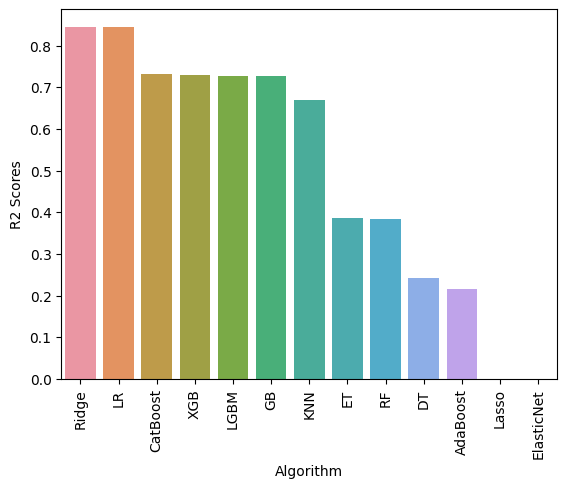

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = performance_df['Algorithm'], y = performance_df['R2 Scores'])
plt.xticks(rotation = 'vertical')
plt.show()

In [111]:
reg = ridge

In [113]:
reg.fit(X_train, y_train)

Ridge()

In [114]:
y_pred=reg.predict(X_test)

In [115]:
y_pred.shape

(223592,)

In [116]:
y_test.shape

(223592,)

In [117]:
r2_score(y_test, y_pred)

0.8448773367298927

In [118]:
Xf = test.iloc[:, :]

In [119]:
Xf = sc.transform(Xf)

In [120]:
yf=reg.predict(Xf)

In [121]:
submission=pd.DataFrame()

In [123]:
submission['id']=id
submission['FloodProbability']=yf

In [124]:
submission.sample(5)

,id,FloodProbability
612839,1730796,0.500196
447535,1565492,0.579048
675804,1793761,0.466099
183525,1301482,0.358914
395657,1513614,0.511312


In [125]:
submission.to_csv('submission.csv', index=False)